### Analyze JNJ dataset with statsmodels
- explore datasets
- check autocorrelation, partial correlation
- observe how random walk, random sample performs
- ArmaProcess, ARIMA, plot_predict with single stocks

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
 

In [2]:
pd.options.display.float_format = '{:.4%}'.format

data = pd.read_csv("/home/becode/Desktop/Time Series/venv/scr/data/yfin_JNJ.csv", index_col='Date', parse_dates=['Date'])
data = data[data.index > '01-01-2015']
Y = data.pct_change().dropna()
display(Y.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,-0.5426%,-0.7769%,-0.4321%,-0.6984%,-0.6984%,40.4216%
2015-01-06,-0.1340%,0.2483%,-0.7137%,-0.4914%,-0.4914%,-8.0613%
2015-01-07,-0.4121%,0.8001%,0.8451%,2.2076%,2.2076%,6.7811%
2015-01-08,2.0691%,0.6236%,1.8688%,0.7863%,0.7863%,25.0173%
2015-01-09,0.4149%,0.0094%,-0.9456%,-1.3629%,-1.3629%,-25.7281%


Autocorrelation for weekly stock returns is -0.05

In [3]:
MSFT = data.resample(rule='W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.03


Long term changes in interest rates are negatively autocorrelated

In [4]:
# Compute the daily change in interest rates 
daily_diff = data.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['Adj Close'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = data.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['Adj Close'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is -0.09
The autocorrelation of annual interest rate changes is -0.23


Resample data in quarterly and observe 'Open' column

[ 1.          0.87679151  0.7816554   0.67094924  0.5322265   0.44707143
  0.34535808  0.24786852  0.16751377  0.08322168  0.04821916  0.01866837
  0.02222357 -0.02052577 -0.06283342 -0.08627227]


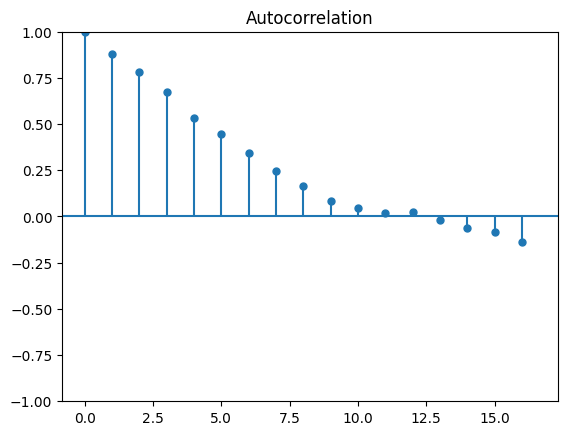

In [5]:
# resample quarterly to see distribution of 
HRB = data.resample(rule='Q').last()
# Compute the acf array of HRB
acf_array = acf(HRB.iloc[:,0])
print(acf_array)

# Plot the acf function
plot_acf(HRB.iloc[:,0], alpha=1)
plt.show()

                 Open       High        Low      Close  Adj Close  \
Date                                                                
2016-03-31  788.9999%  749.0005%  745.0005%  759.9998%  873.7061%   
2016-06-30 2075.0000% 2296.0007% 2186.0001% 2384.0004% 2229.5525%   
2016-09-30 2365.0002% 2415.0002% 2480.0003% 2477.9999% 2306.1630%   
2016-12-31 1243.0000% 1236.9995% 1229.0001% 1248.9998% 1298.3765%   
2017-03-31 1525.0000% 1584.9998% 1598.9998% 1635.0006% 1643.6478%   
2017-06-30 1351.9997% 1178.9993% 1311.9995% 1098.9990% 1219.1727%   

                     Volume  
Date                         
2016-03-31   13970000.0000%  
2016-06-30  259200000.0000%  
2016-09-30 -302900000.0000%  
2016-12-31   91410000.0000%  
2017-03-31 -251010000.0000%  
2017-06-30 -629550000.0000%  


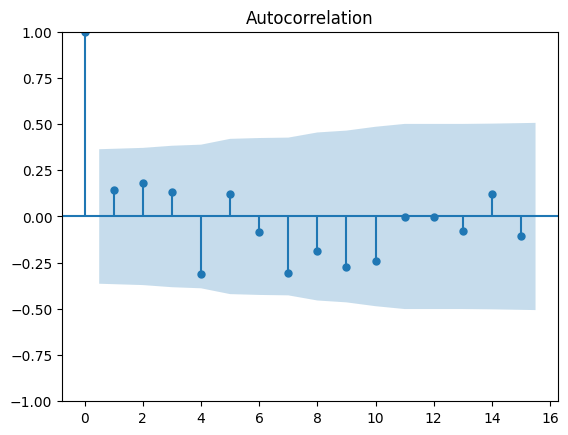

In [6]:
# Seasonally adjust quarterly earnings  - Drop first 4 rows with null values
HRBsa = HRB.diff(4).dropna()

# Print the first 6 rows of the seasonally adjusted series
print(HRBsa.head(6))

# Plot the autocorrelation function of the seasonally adjusted series of the 'Close' column
plot_acf(HRBsa.iloc[:,3])
plt.show()

### Observe how random data is displayed

The mean is 0.023 and the standard deviation is 0.050


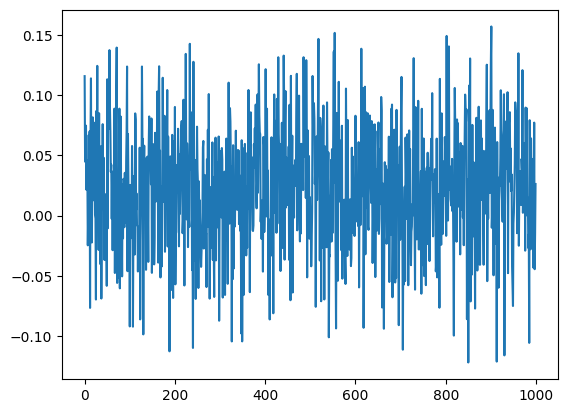

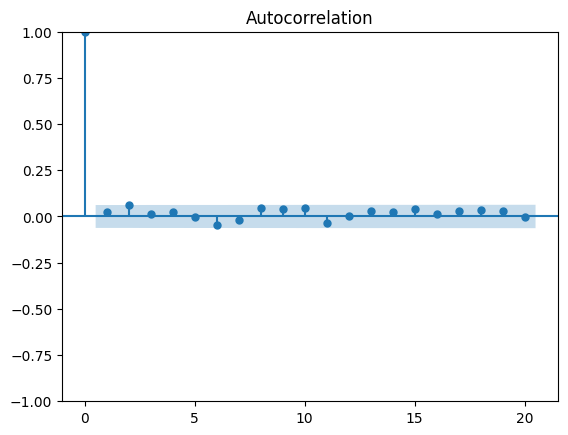

In [7]:
# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

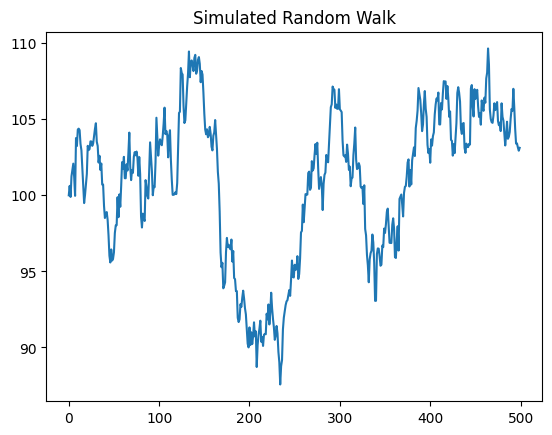

In [8]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

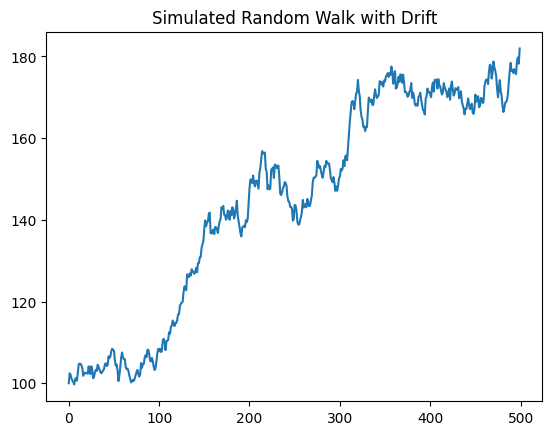

In [9]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

 Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk<br>
 p-value of the test on prices is: 0.9930015035760065 -- we fail to reject that the series is a random walk

In [10]:
# Run the ADF test on the price series and print out the results
results = adfuller(data['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(-1.2918788059133237, 0.632879531090404, 10, 2056, {'1%': -3.4335345735350664, '5%': -2.862946794168607, '10%': -2.567518913543354}, 7356.154338737567)
The p-value of the test on prices is: 0.632879531090404


p-value of the test on returns is: 9.660410067020314e-30<br>
shows that the returns do not follow a random walk

In [11]:
# Create a DataFrame of JNJ returns
JNJ_ret = data.pct_change()

# Eliminate the NaN in the first row of returns
JNJ_ret = JNJ_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(JNJ_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.6983583801876078e-27


### ArmaProcess with random data

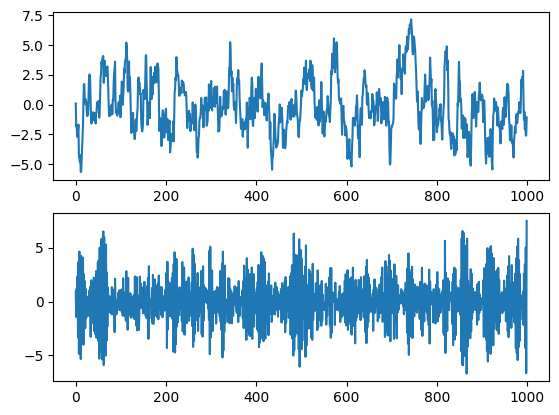

In [12]:
# import the module for simulating data


# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

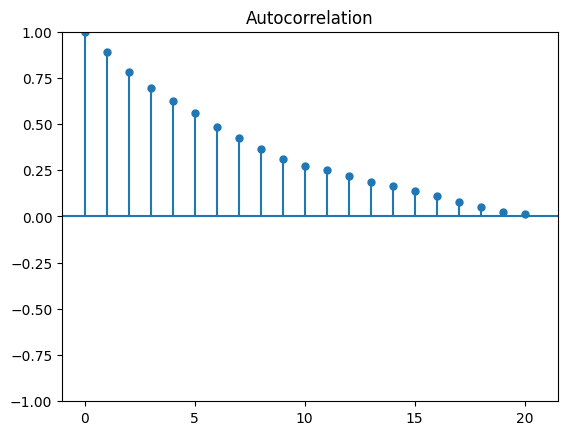

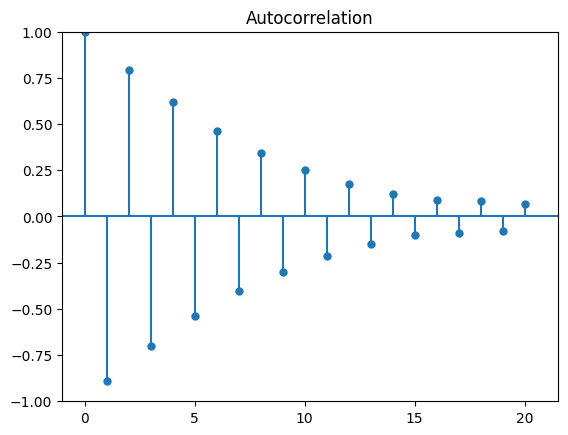

In [13]:
# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1,  alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2,  alpha=1, lags=20)
plt.show()


In [14]:
# Fit an AR(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.9, the estimate of phi is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1430.973
Date:                Tue, 21 Mar 2023   AIC                           2867.946
Time:                        12:26:01   BIC                           2882.669
Sample:                             0   HQIC                          2873.542
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1574      0.290     -0.542      0.588      -0.727       0.412
ar.L1          0.8897      0.015     61.171      0.000       0.861       0.918
sigma2         1.0227      0.046     22.135      0.0

In [15]:
simulated_data_1 =pd.DataFrame(simulated_data_1)

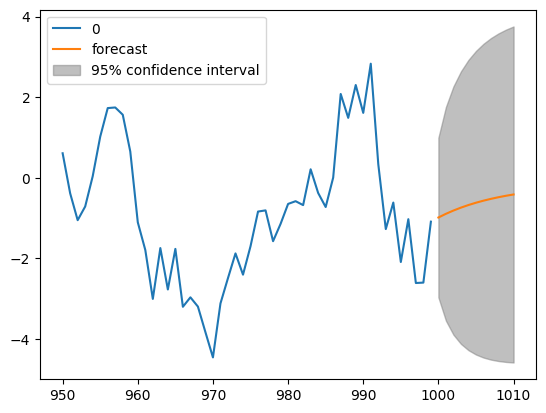

In [16]:
# Forecast the first AR(1) model
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

### Observe how statsmodels will predict stock prices

In [17]:
daily_diff = pd.read_csv('/home/becode/Desktop/Time Series/venv/scr/data/yfin_AdjClose.csv', index_col='Date', parse_dates=['Date'])

In [18]:
daily_diff = daily_diff[(daily_diff['ABT']>0)&(daily_diff['JNJ']>0)].iloc[:,1]
daily_diff = daily_diff[daily_diff.index > '01-01-2022']
daily_diff

Date
2022-01-03   16595.4788%
2022-01-04   16550.9781%
2022-01-05   16661.2640%
2022-01-06   16604.1870%
2022-01-07   16828.6316%
                 ...    
2023-03-14   15391.9998%
2023-03-15   15435.0006%
2023-03-16   15402.9999%
2023-03-17   15238.0005%
2023-03-20   15388.9999%
Name: JNJ, Length: 304, dtype: float64

### ARIMA model for JNJ ( Johnson & Johnson )

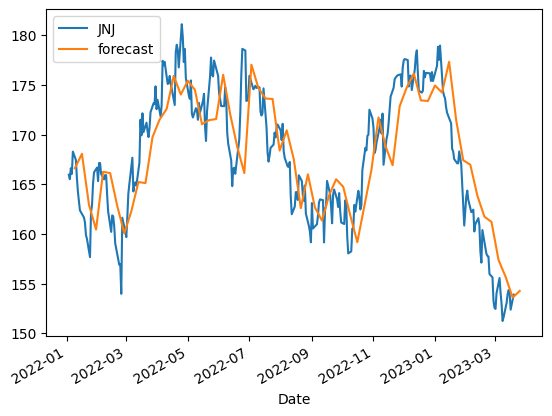

In [19]:
# Forecast interest rates using an AR(1) model
daily_diff1 = daily_diff.resample(rule='W').last()

mod = ARIMA(daily_diff1, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
daily_diff.plot(ax=ax)
plot_predict(res, start='2022', end='2023', alpha=None, ax=ax)
plt.show()

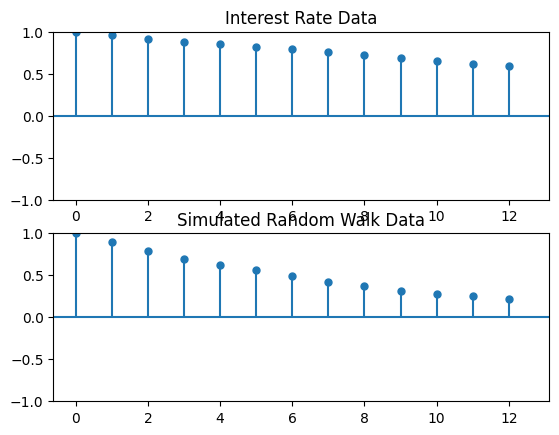

In [20]:
# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(daily_diff, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data_1, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

In [21]:
# Fit an MA(1) model to the first simulated data
mod = ARIMA(daily_diff1, order=(0,0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                    JNJ   No. Observations:                   64
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -190.695
Date:                Tue, 21 Mar 2023   AIC                            387.389
Time:                        12:26:02   BIC                            393.866
Sample:                    01-09-2022   HQIC                           389.941
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        167.6523      1.076    155.852      0.000     165.544     169.761
ma.L1          0.7613      0.099      7.697      0.000       0.567       0.955
sigma2        22.3716      4.262      5.249      0.0

### Run ARIMA for JNJ Stocks Dataset with percent change for the 'Close' prices

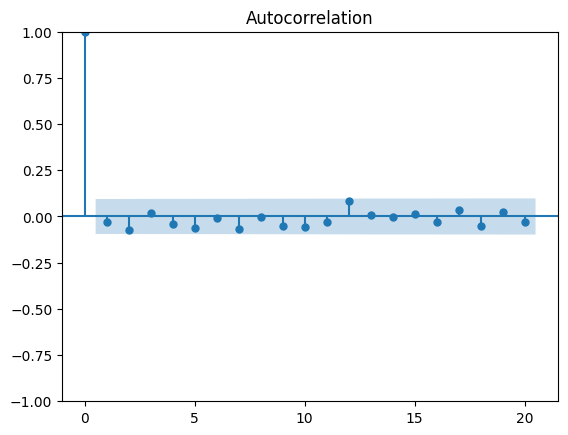

-0.030511273834519046


In [22]:
data = pd.read_csv("/home/becode/Desktop/Time Series/venv/scr/data/yfin_JNJ.csv", index_col='Date', parse_dates=['Date'])
data = data[data.index > '01-01-2015']
# Compute returns from prices and drop the NaN
data = data.resample(rule='W').last()
returns = data.pct_change().dropna()

# Plot ACF of returns with lags up to 60
plot_acf(returns.iloc[:,3], lags = 20)
plt.show()

# Fit the data to an MA(1) model
mod = ARIMA(returns.iloc[:,3], order=(0,0,1))
res = mod.fit()
print(res.params[1])

In [23]:
# Compute the ADF for HO and NG
result_HO = adfuller(data['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(data['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * data['Close'] -  data['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.4296430386998371
The p-value for the ADF test on NG is  0.4296430386998371
The p-value for the ADF test on the spread is  0.4296430386998371


### Display forecast for ARIMA

In [24]:
data = pd.read_csv("/home/becode/Desktop/Time Series/venv/scr/data/yfin_JNJ.csv")
data = data[data['Date'] > '01-01-2015']
data_1 = data[['Close']]

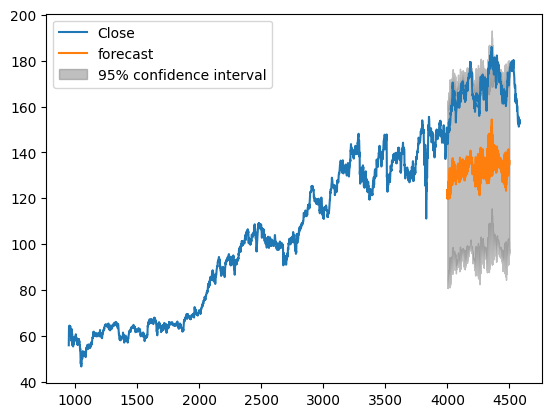

In [25]:
# Forecast the first MA(1) model
mod = ARIMA(data_1, order=(0,0,1))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
data_1.loc[950:].plot(ax=ax)
plot_predict(res, start = 4000, end = 4500, ax=ax)
plt.show()

See if there is linear relationship between the Adj Close prices of the JNJ and Abbott Labs

In [26]:
data = pd.read_csv("/home/becode/Desktop/Time Series/venv/scr/data/yfin_AdjClose.csv", parse_dates=['Date'])

In [27]:
ETH = data[['JNJ']]
BTC = data[['ABT']]

In [28]:
# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]

adf_stats = adfuller(BTC['ABT'] - b*ETH['JNJ'])
print("The p-value for the ADF test is ", adf_stats[1])

The p-value for the ADF test is  0.20274359922971535


### The best correlation found between stock prices with statsmodels OLS is 0.56 % for a smaller dataset. For 2005-2023 there is 0.96% correlation between the 2 largest stocks

In [29]:
# Compute correlation of x and y
correlation = data['ABT'].corr(data['JNJ'])
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(data['JNJ'], columns=['JNJ'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(data['ABT'] ,dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is 0.96
                            OLS Regression Results                            
Dep. Variable:                    ABT   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 4.784e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:26:05   Log-Likelihood:                -17020.
No. Observations:                4584   AIC:                         3.404e+04
Df Residuals:                    4582   BIC:                         3.406e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       